<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Полезные-ссылки:" data-toc-modified-id="Полезные-ссылки:-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span><font color="orange">Полезные ссылки:</font></a></span></li></ul></li><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Разделяем-признаки-на-обучающую-и-тестовую-выборки" data-toc-modified-id="Разделяем-признаки-на-обучающую-и-тестовую-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Разделяем признаки на обучающую и тестовую выборки</a></span></li><li><span><a href="#Разделяем-признаки-на-обучающую-и-валидационную-выборки-для-моделей-без-кросс-валидации" data-toc-modified-id="Разделяем-признаки-на-обучающую-и-валидационную-выборки-для-моделей-без-кросс-валидации-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Разделяем признаки на обучающую и валидационную выборки для моделей без кросс-валидации</a></span></li><li><span><a href="#Dummy-модель" data-toc-modified-id="Dummy-модель-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Dummy-модель</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Lasso" data-toc-modified-id="Lasso-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Lasso</a></span></li><li><span><a href="#Ridge" data-toc-modified-id="Ridge-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Ridge</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#Итоговая-таблица" data-toc-modified-id="Итоговая-таблица-3.12"><span class="toc-item-num">3.12&nbsp;&nbsp;</span>Итоговая таблица</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from catboost import Pool, cv
import catboost as cb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit

In [3]:
# открываем датасет
df = pd.read_csv('/Users/a1/Downloads/taxi.csv', index_col=['datetime'], parse_dates=['datetime'])

In [4]:
# смотрим общую информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>

DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00

Data columns (total 1 columns):

 #   Column      Non-Null Count  Dtype

---  ------      --------------  -----

 0   num_orders  26496 non-null  int64

dtypes: int64(1)

memory usage: 414.0 KB


In [5]:
# выводим первые пять строк датасета для ознакомления
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [6]:
# смотрим период, за который предоставлены данные
print(f"Df date min-max: {df.index.min()} --- {df.index.max()}  (n={len(df)})")

Df date min-max: 2018-03-01 00:00:00 --- 2018-08-31 23:50:00  (n=26496)


In [7]:
# изменяем период на 1 ч.
df = df.sort_index()
df = df.resample('1H').sum()

In [8]:
# выводим первые 5 стьрок обновлённого датасета
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


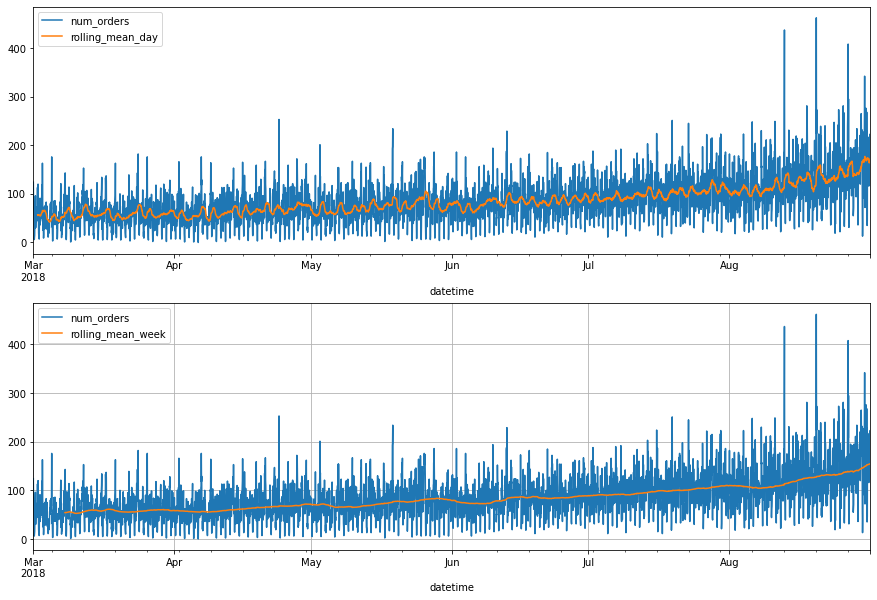

In [9]:
# строим графики
plt.figure(figsize=(15, 10))
plt.subplot(211)
df.plot(ax=plt.gca())
df.rolling(24).mean().plot(ax=plt.gca())
plt.legend(['num_orders', 'rolling_mean_day'])
plt.subplot(212)
df.plot(ax=plt.gca())
df.rolling(24 * 7).mean().plot(ax=plt.gca())
plt.legend(['num_orders', 'rolling_mean_week'])
plt.grid(True)

In [10]:
# смотрим пропуски
df.isna().sum()

num_orders    0
dtype: int64

**Вывод**

Данные открыты и изучены, проблем в них не обнаружено, можно переходить к анализу и обучению моделей.

## Анализ

In [11]:
# проверяем данные на сезонность
decomposed = seasonal_decompose(df)

Text(0.5, 1.0, 'Residuals')

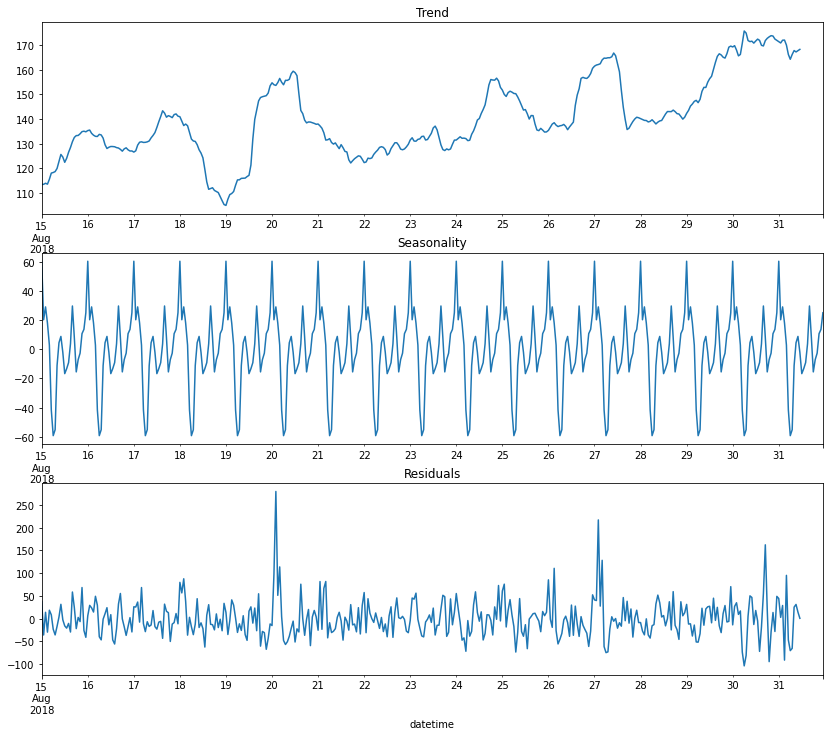

In [12]:
# строим графики тренда, сезонности и остатков
plt.figure(figsize=(14, 12))
plt.subplot(311)
decomposed.trend['2018-08-15': '2018-08-31'].plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal['2018-08-15': '2018-08-31'].plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid['2018-08-15': '2018-08-31'].plot(ax=plt.gca())
plt.title('Residuals')
#plt.tight_layout()

**Вывод**

Временной ряд нестационарный, т.е. имеет возрастающий тренд и дневную сезонность.

Приведём его к стационарному виду, чтобы моделям было проще работать с ним.

In [13]:
# не удаляем нестационароность ряда
data = df

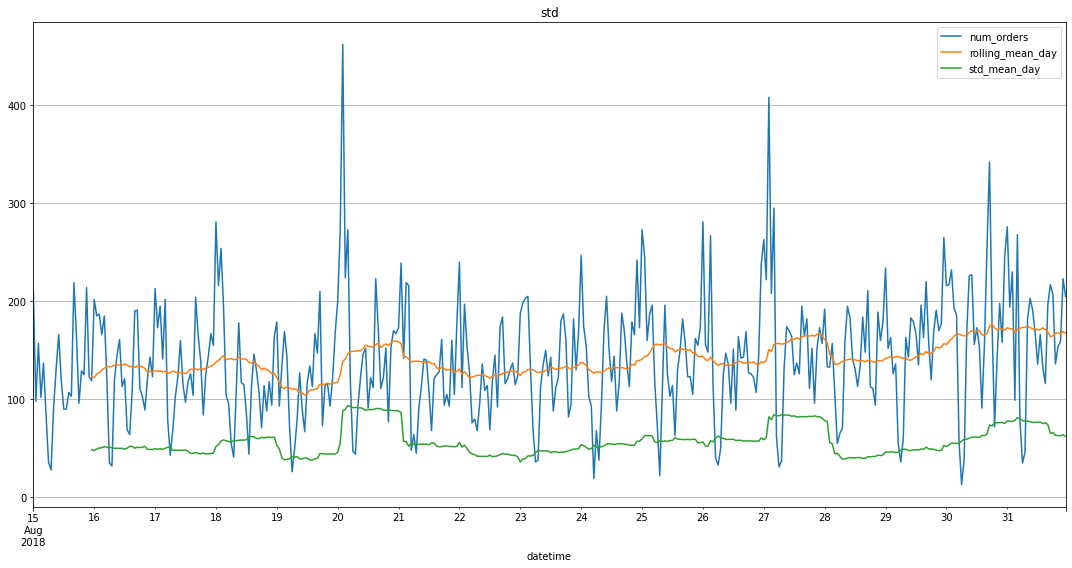

In [14]:
# строим графики большего масштаба за последние 2 недели
plt.figure(figsize=(15, 8))
data['num_orders']['2018-08-15': '2018-08-31'].plot(ax=plt.gca())
plt.title('num_orders')
data['num_orders']['2018-08-15': '2018-08-31'].rolling(24).mean().plot(ax=plt.gca())
plt.title('rolling_mean')
data['num_orders']['2018-08-15': '2018-08-31'].rolling(24).std().plot(ax=plt.gca())
plt.title('std')
plt.tight_layout()
plt.legend(['num_orders', 'rolling_mean_day', 'std_mean_day'])
plt.grid(True)

**Вывод**

Привели ряд к стационарному виду, можно приступать к обучению и выбору модели.

## Обучение

### Подготовка признаков

In [15]:
# напишем функцию, которая подготовит признаки для обучения моделей
def make_features(data, max_lag, rolling_mean_size):
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['lag_1'].rolling(rolling_mean_size).mean()
    return data

In [16]:
# применяем функцию к нашему датасету
make_features(data, 12, 6)

,num_orders,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,rolling_mean
datetime,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,3,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,1,3,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,1,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,1,3,66.0,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,8,31,4,207.0,217.0,197.0,116.0,133.0,166.0,136.0,167.0,191.0,203.0,182.0,46.0,172.666667
2018-08-31 20:00:00,154,8,31,4,136.0,207.0,217.0,197.0,116.0,133.0,166.0,136.0,167.0,191.0,203.0,182.0,167.666667
2018-08-31 21:00:00,159,8,31,4,154.0,136.0,207.0,217.0,197.0,116.0,133.0,166.0,136.0,167.0,191.0,203.0,171.166667


In [17]:
# поскольку пропуски заполнить нечем, удаляем их
data = data.dropna()

In [18]:
# смотрим общую информацию о получившемся датасете
data.info()

<class 'pandas.core.frame.DataFrame'>

DatetimeIndex: 4404 entries, 2018-03-01 12:00:00 to 2018-08-31 23:00:00

Freq: H

Data columns (total 17 columns):

 #   Column        Non-Null Count  Dtype  

---  ------        --------------  -----  

 0   num_orders    4404 non-null   int64  

 1   month         4404 non-null   int64  

 2   day           4404 non-null   int64  

 3   dayofweek     4404 non-null   int64  

 4   lag_1         4404 non-null   float64

 5   lag_2         4404 non-null   float64

 6   lag_3         4404 non-null   float64

 7   lag_4         4404 non-null   float64

 8   lag_5         4404 non-null   float64

 9   lag_6         4404 non-null   float64

 10  lag_7         4404 non-null   float64

 11  lag_8         4404 non-null   float64

 12  lag_9         4404 non-null   float64

 13  lag_10        4404 non-null   float64

 14  lag_11        4404 non-null   float64

 15  lag_12        4404 non-null   float64

 16  rolling_mean  4404 non-null   float64

dtypes: f

### Разделяем признаки на обучающую и тестовую выборки

In [19]:
# разделяем датасет на обучающую и тестовую выборки
train, test = train_test_split(data, shuffle=False, test_size=0.1)

In [20]:
# смотрим на размеры получившихся выборок
print(train.shape, test.shape)

(3963, 17) (441, 17)


In [21]:
# подготавливаем обучающие и целевые признаки
features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
print(features_train.shape, target_train.shape)

(3963, 16) (3963,)


In [22]:
# выделяем обучающие и целевые признаки
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']
print(features_test.shape, target_test.shape)

(441, 16) (441,)


### Разделяем признаки на обучающую и валидационную выборки для моделей без кросс-валидации

In [23]:
# выделяем отдельный набор обучающих и целевых признаков для моделей, которым не будем делать кросс-валидацию
train_ext, valid = train_test_split(train, shuffle=False, test_size=0.11)

In [24]:
# подготавливаем обучающие и целевые признаки
features_train_ext = train_ext.drop(['num_orders'], axis=1)
target_train_ext = train_ext['num_orders']
print(features_train_ext.shape, target_train_ext.shape)

(3527, 16) (3527,)


In [25]:
# подготавливаем обучающие и целевые признаки
features_valid = valid.drop(['num_orders'], axis=1)
target_valid = valid['num_orders']
print(features_valid.shape, target_valid.shape)

(436, 16) (436,)


### Dummy-модель

In [33]:
%%time

# обучаем и смотрим на результаты простой Dummy-модели для сравнения
model = DummyRegressor()
model.fit(features_train_ext, target_train_ext)
predictions = model.predict(features_valid)
print('rmse =', mean_squared_error(target_valid, predictions) ** 0.5)
# смотрим на качество и скорость работы простой Dummy-модели для сравнения

rmse = 58.27762576158207

CPU times: user 2.61 ms, sys: 622 µs, total: 3.23 ms

Wall time: 2.88 ms


### Линейная регрессия

In [34]:
%%time

# обучаем и смотрим на результаты Линейной регрессии
model = LinearRegression()
model.fit(features_train_ext, target_train_ext)
predictions = model.predict(features_valid)
print('rmse =', mean_squared_error(target_valid, predictions) ** 0.5)

rmse = 40.06831595077591

CPU times: user 59.9 ms, sys: 14 ms, total: 73.9 ms

Wall time: 24.8 ms


### Lasso

In [35]:
%%time

# обучаем и смотрим на результаты модели Lasso
model = linear_model.Lasso(random_state=12345)
model.fit(features_train_ext, target_train_ext)
predictions = model.predict(features_valid)
print('rmse =', mean_squared_error(target_valid, predictions) ** 0.5)

rmse = 40.255029200989085

CPU times: user 28.3 ms, sys: 13.4 ms, total: 41.6 ms

Wall time: 20.2 ms


### Ridge

In [36]:
%%time

# обучаем и смотрим на результаты модели Ridge
model = Ridge(random_state=12345)
model.fit(features_train_ext, target_train_ext)
predictions = model.predict(features_valid)
print('rmse =', mean_squared_error(target_valid, predictions) ** 0.5)

rmse = 40.068615293482644

CPU times: user 28.5 ms, sys: 16.3 ms, total: 44.8 ms

Wall time: 16.6 ms


### Случайный лес

In [37]:
%%time

# проводим кросс-валидацию Случайного леса методом TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=3)
i = 1
score = []
for tr_index, val_index in tscv.split(features_train.index):
    X_tr, X_val = features_train.iloc[tr_index], features_train.iloc[val_index]
    y_tr, y_val = target_train.iloc[tr_index], target_train.iloc[val_index]
    for mf in range(1, 10, 1):
        for ne in range(1, 10, 1):
            for md in range(1, 10, 1):
                for msl in range(1, 10, 1):
                    rfr = RandomForestRegressor(
                        max_features=mf,
                        n_estimators=ne,
                        max_depth=md,
                        min_samples_leaf=msl, random_state=12345)
                    rfr.fit(X_tr, y_tr)
                    score.append([i, mf, ne, md, msl, mean_squared_error(rfr.predict(X_val), y_val) ** 0.5])
    i += 1

CPU times: user 3min 25s, sys: 775 ms, total: 3min 26s

Wall time: 3min 26s


In [126]:
# смотрим на лучшее значение метрики и значения гиперпараметров.
sc = pd.DataFrame(score)
sc[sc[0] == 3].sort_values(by=5).head(1)

,0,1,2,3,4,5
18220,3,7,9,9,5,36.255035


### Дерево решений

In [33]:
%%time

# проводим кросс-валидацию Дерева решений методом TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=3)
i = 1
score = []
for tr_index, val_index in tscv.split(features_train.index):
    X_tr, X_val = features_train.iloc[tr_index], features_train.iloc[val_index]
    y_tr, y_val = target_train.iloc[tr_index], target_train.iloc[val_index]
    for mf in range(1, 10, 1):
        for md in range(1, 10, 1):
            for msl in range(1, 10, 1):
                dtr = DecisionTreeRegressor(
                    max_features=mf,
                    max_depth=md,
                    min_samples_leaf=msl, random_state=12345)
                dtr.fit(X_tr, y_tr)
                score.append([i, mf, md, msl, mean_squared_error(dtr.predict(X_val), y_val) ** 0.5])
    i += 1

In [39]:
# смотрим на лучшее значение метрики и гиперпараметры
sc = pd.DataFrame(score)
sc[sc[0] == 3].sort_values(by=4).head(1)

,0,1,2,3,4,5
13122,3,1,1,1,1,49.449969


### CatBoost

In [40]:
%%time

# подбираем гиперпараметры и смотрим на результаты модели CatBoost
cbr = CatBoostRegressor(random_state=12345, verbose=0)
train_dataset = cb.Pool(features_train, target_train)
grid = {'iterations': [300, 500, 1000],
        'learning_rate': [0.1, 0.03, 0.003],
        'depth': [2, 4, 6, 8, 10],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
CV_cbr = cbr.grid_search(grid, train_dataset, verbose=0, shuffle=False, plot=True, calc_cv_statistics=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))



bestTest = 37.20661337

bestIteration = 296





bestTest = 39.6230504

bestIteration = 299





bestTest = 70.92703797

bestIteration = 299





bestTest = 37.41790258

bestIteration = 298





bestTest = 39.58055829

bestIteration = 298





bestTest = 70.93959455

bestIteration = 299





bestTest = 37.49667033

bestIteration = 298





bestTest = 39.56912497

bestIteration = 298





bestTest = 70.96853799

bestIteration = 299





bestTest = 37.59900229

bestIteration = 299





bestTest = 39.6366181

bestIteration = 298





bestTest = 71.10689782

bestIteration = 299





bestTest = 36.94513091

bestIteration = 442





bestTest = 38.36567595

bestIteration = 493





bestTest = 57.55013262

bestIteration = 499





bestTest = 36.87864537

bestIteration = 459





bestTest = 38.48855041

bestIteration = 499





bestTest = 57.58996644

bestIteration = 499





bestTest = 37.26395037

bestIteration = 408





bestTest = 38.51259836

bestIteration = 494





bestTest = 57.646232

In [41]:
# выводим лучшее значение гиперпараметров
print(CV_cbr)

{'params': {'depth': 6, 'iterations': 300, 'learning_rate': 0.1, 'l2_leaf_reg': 0.5}}


### LightGBM

In [26]:
%%time

# проводим кросс-валидацию модели LightGBM методом TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=3)
i = 1
score = []
for tr_index, val_index in tscv.split(features_train.index):
    X_tr, X_val = features_train.iloc[tr_index], features_train.iloc[val_index]
    y_tr, y_val = target_train.iloc[tr_index], target_train.iloc[val_index]
    for nl in range(2, 10, 1):
        for ne in range(50, 200, 50):
            for md in range(1, 5, 1):
                lgbm = LGBMRegressor(num_leaves=nl, n_estimators=ne, max_depth=md)
                lgbm.fit(X_tr, y_tr)
                score.append([i, nl, ne, md, mean_squared_error(lgbm.predict(X_val), y_val) ** 0.5])
                              
    i += 1

CPU times: user 35.7 s, sys: 3.36 s, total: 39.1 s

Wall time: 5.08 s


In [27]:
# выводим лучшее значение метрики и значения гиперпараметров
sc = pd.DataFrame(score)
sc[sc[0] == 3].sort_values(by=4).head(1)

,0,1,2,3,4
259,3,7,100,4,36.182556


### Итоговая таблица

In [42]:
# собираем таблицу с результатами
data = {'RMSE':[58.27, 40.06, 40.25, 40.06, 37.62, 40.30, 35.76, 36.18]} 
df_total = pd.DataFrame(data, index =['Dummy', 'LinearRegression', 'Lasso', 'Ridge', 
                                'RandomForestRegressor',  'DecisionTree', 'CatBoost', 'LightGBM'])

In [43]:
# выводим таблицу, отсортированную по возрастанию метрики
display(df_total.sort_values(by='RMSE'))

,RMSE
CatBoost,35.76
LightGBM,36.18
RandomForestRegressor,37.62
LinearRegression,40.06
Ridge,40.06
Lasso,40.25
DecisionTree,40.30
Dummy,58.27


**Вывод**

Лучший результат в отборочном туре показала модель CatBoost, поэтому выбираем её.

## Тестирование

In [45]:
%%time

# обучаем лучшую модели и смотрим на результаты
model = CatBoostRegressor(depth=6, iterations=1000, learning_rate=0.03, l2_leaf_reg=0.5, verbose=0)
model.fit(features_train, target_train)
predictions = model.predict(features_test)
print('rmse =', mean_squared_error(target_test, predictions) ** 0.5)

rmse = 47.969293091716935

CPU times: user 3.55 s, sys: 1.34 s, total: 4.88 s

Wall time: 1.47 s


In [47]:
pred_val = pd.DataFrame(predictions, columns=['predictions'], index=target_test.index)
pd.concat([pred_val, target_test], axis=1).head()

,predictions,num_orders
datetime,,
2018-08-13 15:00:00,119.014823,175
2018-08-13 16:00:00,136.783122,144
2018-08-13 17:00:00,152.156002,152
2018-08-13 18:00:00,126.368048,104
2018-08-13 19:00:00,114.157378,91


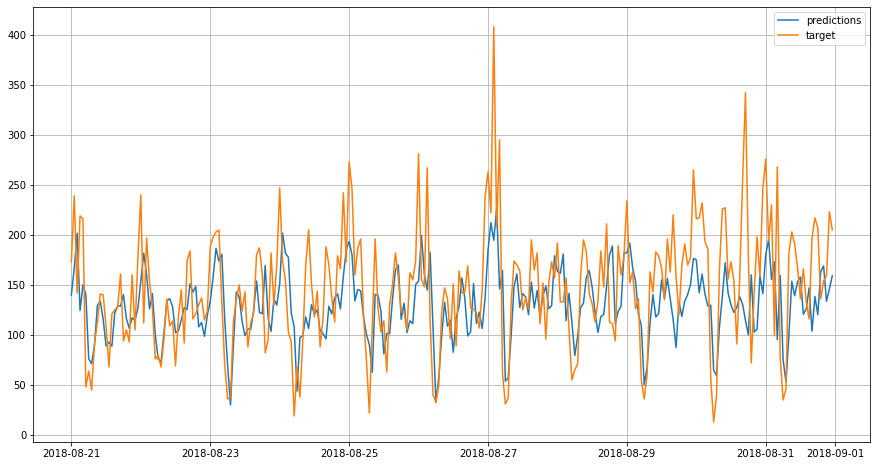

In [46]:
plt.figure(figsize=(15, 8))
plt.plot(pd.DataFrame(predictions, index=target_test.index)['2018-08-21': '2018-08-31'], label="prediction")
plt.plot(target_test['2018-08-21': '2018-08-31'], label="target")
plt.legend(['predictions', 'target'])
plt.grid(True)

**Вывод**

В ходе исследования были изучены и проанализированы данные, подготовлены признаки для обучения моделей, модели обучены и среди них была выбрана модель CatBoost, показывающее наилучшее значение метрики, её и выбрали для дальней работы.

В ходе тестирования модель с подобранными гиперпараметрами показала хорошее значение метрики, которое отвечает требованиям поставленной задачи, а именно чтобы значение RMSE было ниже 48, в нашем случае получилось 46.95. Поэтому можем рекомендовать данную модель для задачи прогнозирования спроса на такси на час вперёд.